## Classify digits datasets from sklearn.datasets

We will classfiy the handwritten images to its correct target names


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline
import seaborn as sn
from sklearn.datasets import load_digits

### checking digits directory 

In [7]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [10]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
digits.target[0]

0

In [13]:
digits.target_names[0]

0

#### Plotting image in grayscale

<Figure size 432x288 with 0 Axes>

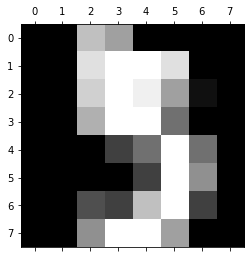

In [17]:
plt.gray()
plt.matshow(digits.images[5])

### Creating Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [20]:
digits.data.shape

(1797, 64)

In [21]:
1791*.8

1432.8000000000002

In [23]:
len(X_train)

1437

In [22]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [24]:
lr.fit(X_train,y_train)

E:\Coding\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Coding\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Calculating Model Score

In [25]:
lr.score(X_test,y_test)

0.95

### Predicting random values

In [32]:
digits.target[77]

2

In [30]:
lr.predict(digits.data[[77]])

array([2])

In [33]:
digits.target[47]

1

In [31]:
lr.predict(digits.data[[47]])

array([1])

### Confusion Matrix

In [40]:
y_predict= lr.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  1,  0,  1,  0],
       [ 0,  0,  0,  1,  0, 38,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  1,  1],
       [ 0,  2,  0,  0,  1,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  3, 33]], dtype=int64)

#### Plotting headmap of confusion matrix 

Text(42.0, 0.5, 'real')

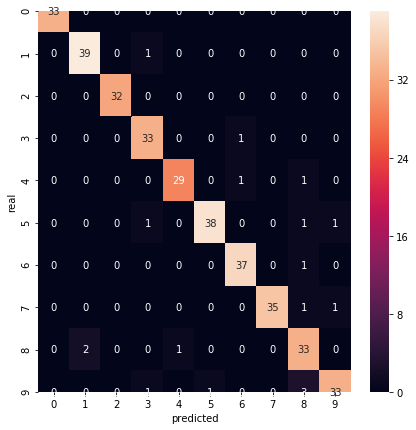

In [52]:
plt.figure(figsize=(7,7))
sn.heatmap(cm,annot= True)
plt.xlabel('predicted')
plt.ylabel('real')